<a href="https://colab.research.google.com/github/MehmetKaTR/DL_lebron_or_sharapova/blob/main/DL_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab.patches import cv2_imshow

In [69]:
import os
import cv2

img_list = []
class_label = []
paths = ["/content/drive/MyDrive/AITOLIA/Image Classification 01/mariaPhotos/","/content/drive/MyDrive/AITOLIA/Image Classification 01/lebronPhotos/"]

face_cascade = cv2.CascadeClassifier("/content/drive/MyDrive/AITOLIA/Image Classification 01/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("/content/drive/MyDrive/AITOLIA/Image Classification 01/haarcascade_eye.xml")


def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

for directory_path in paths:
  for link in os.listdir(directory_path):
      img = get_cropped_image_if_2_eyes(os.path.join(directory_path, link))

      if img is not None:
          resized_img = cv2.resize(img, (32, 32))
          resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
          img_list.append(resized_img)
          if directory_path.endswith("mariaPhotos/"):
            class_label.append(int(0))
          else:
            class_label.append(int(1))
      else:
          print(f"Error reading image: {link}")

Error reading image: 220px-Sharapova_WM19_(5)_(48521917742).jpg
Error reading image: 220px-Flickr_-_Carine06_-_Maria_Sharapova_(1).jpg
Error reading image: 200px-Maria_Sharapova_US_Open_2007.jpg
Error reading image: _111046104_ee43a886-09fc-4e43-bcb7-6fc4541d032d.jpg
Error reading image: Maria-Sharapova-women-singles-event-US-Open-2006 (1).jpg
Error reading image: 61pQIoqAWIL.jpg
Error reading image: 1200x675_cmsv2_d95262de-0826-5db4-bc79-595e0c8c7c31-4527966.jpg
Error reading image: 62820fcd45d2a051587b73f7.jpg
Error reading image: maria-sharapova-tennis.jpg
Error reading image: 634388.jpg
Error reading image: 728xauto.jpg
Error reading image: 751443-21085608-2560-1440.jpg
Error reading image: h_778.jpg
Error reading image: maria-sharapova-ap2jpg.jpg
Error reading image: 220px-Maria_Sharapova_2011.jpg
Error reading image: 209862.jpg
Error reading image: sharapova.jpg
Error reading image: maria-sharapova-20140405_jr_supergoop_0358b_v3_flat.jpg
Error reading image: 1219_1800x.jpg
Error 

In [3]:
os.path.join(directory_path,link)

'/content/drive/MyDrive/AITOLIA/Image Classification 01/lebronPhotos/r0vuh3itatmf8qoddoun.jpg'

In [5]:
import numpy as np

In [73]:
X = np.array(img_list)
X = X.reshape(X.shape[0], 32, 32, 1)
X.shape

(76, 32, 32, 1)

In [52]:
y = np.array(class_label)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
from sklearn.model_selection import train_test_split

In [ ]:
import keras
import tensorflow as tf
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, train_size=0.8)

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

model = keras.models.Sequential()

model.add(keras.layers.LSTM(128, input_shape=(32,32), return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(128))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(2, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))


Epoch 1/30
2/2 [==============================] - 7s 798ms/step - loss: 0.6384 - accuracy: 0.5500 - val_loss: 0.7025 - val_accuracy: 0.5000
Epoch 2/30
2/2 [==============================] - 0s 38ms/step - loss: 0.6010 - accuracy: 0.6000 - val_loss: 0.5829 - val_accuracy: 0.5000
Epoch 3/30
2/2 [==============================] - 0s 40ms/step - loss: 0.5371 - accuracy: 0.6833 - val_loss: 0.5226 - val_accuracy: 0.7500
Epoch 4/30
2/2 [==============================] - 0s 39ms/step - loss: 0.4950 - accuracy: 0.7500 - val_loss: 0.5078 - val_accuracy: 0.5625
Epoch 5/30
2/2 [==============================] - 0s 39ms/step - loss: 0.4457 - accuracy: 0.7500 - val_loss: 0.3718 - val_accuracy: 0.8750
Epoch 6/30
2/2 [==============================] - 0s 39ms/step - loss: 0.3377 - accuracy: 0.9333 - val_loss: 0.2488 - val_accuracy: 1.0000
Epoch 7/30
2/2 [==============================] - 0s 42ms/step - loss: 0.3139 - accuracy: 0.9167 - val_loss: 0.1483 - val_accuracy: 1.0000
Epoch 8/30
2/2 [==========

In [78]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

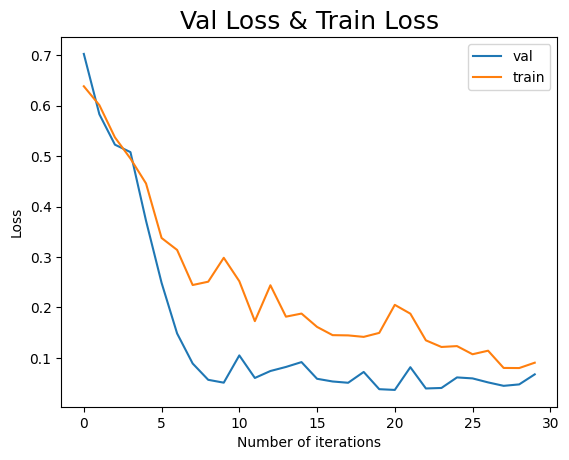

In [79]:
import matplotlib.pyplot as plt

plt.plot(val_loss)
plt.plot(train_loss)
plt.title("Val Loss & Train Loss",size=18)
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.legend(["val","train"])
plt.show()

In [80]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

1/1 [==============================] - 0s 26ms/step - loss: 0.0673 - accuracy: 0.9375
Test Loss: 0.06729958206415176
Test Accuracy: 0.9375


In [91]:
model.predict(X_test)

1/1 [==============================] - 0s 20ms/step


array([[9.9905616e-01, 9.4387424e-04],
       [9.9813807e-01, 1.8619569e-03],
       [9.9482405e-01, 5.1759128e-03],
       [9.9632436e-01, 3.6755740e-03],
       [7.1477480e-03, 9.9285227e-01],
       [6.5838993e-03, 9.9341607e-01],
       [3.1590980e-02, 9.6840906e-01],
       [1.5472188e-02, 9.8452777e-01],
       [6.2802145e-03, 9.9371982e-01],
       [9.6574569e-01, 3.4254376e-02],
       [6.0874313e-01, 3.9125684e-01],
       [1.5430817e-02, 9.8456913e-01],
       [9.9926454e-01, 7.3540426e-04],
       [9.9756634e-01, 2.4336420e-03],
       [4.9455659e-03, 9.9505436e-01],
       [9.9958664e-01, 4.1335923e-04]], dtype=float32)

In [92]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 29ms/step


In [93]:
predicted_labels

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0])

In [94]:
y_test

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0])